Pymaceuticals Inc. Analysis

Based on the analysis below Capomulin is an excellent option to treat tumors in mice. Its efficacy is rivaled only by Ramicane, which has similarly impressive results. Capomulin and Ramican each reduced the tumors in mice the most over the course of this study. They share similar mean, median, variance, standard deviation, and standard error when referring to average tumor volume of the mice who received treatment. Capomulin and Ramican have noticeably more observed timepoints in comparison to the other drugs listed in this study, which may have had an impact on its results.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_data = pd.merge(study_results,mouse_metadata,on=["Mouse ID"],how = "left")

# Display the data table for preview
merged_mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
#Check the number of mice using the .nunique() method on the Mouse ID column

merged_mouse_data['Mouse ID'].nunique()

249

In [4]:
#Find any duplicate mice based on their ID and Timepoint

merged_mouse_data[['Mouse ID','Timepoint']].value_counts()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [5]:
# We see that much of the data involving the mouse with ID g989 is duplicated since it returns 2 with our
# value_counts() method
# Lets isolate all data involving the mouse with id g989 with a loc function
g989_data = merged_mouse_data.loc[merged_mouse_data['Mouse ID'] == "g989"]

g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Now, using loc once again, lets create a clean dataframe and check if the duplicate was dropped.
cleaned_mouse_data = merged_mouse_data.loc[merged_mouse_data['Mouse ID'] != "g989"]

cleaned_mouse_data['Mouse ID'].nunique()

248

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

cleaned_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
#First lets group the dataframe by the Drug Regimen column and begin our calcualtions for the mean, median,variance,
#stdev, and stderr. Once we have all our calculations, we can create a new dataframe with these statistics

grouped_mouse_data = cleaned_mouse_data.groupby(["Drug Regimen"])

tumor_mean = grouped_mouse_data["Tumor Volume (mm3)"].mean()
tumor_median = grouped_mouse_data["Tumor Volume (mm3)"].median()
tumor_variance = grouped_mouse_data["Tumor Volume (mm3)"].var()
tumor_stdev = grouped_mouse_data["Tumor Volume (mm3)"].std()
tumor_stderr = grouped_mouse_data["Tumor Volume (mm3)"].sem() 

summary_statistic_df = pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median,"Variance":tumor_variance,
                                    "Std Dev":tumor_stdev,"Std Error":tumor_stderr})
summary_statistic_df

,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line

cleaned_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

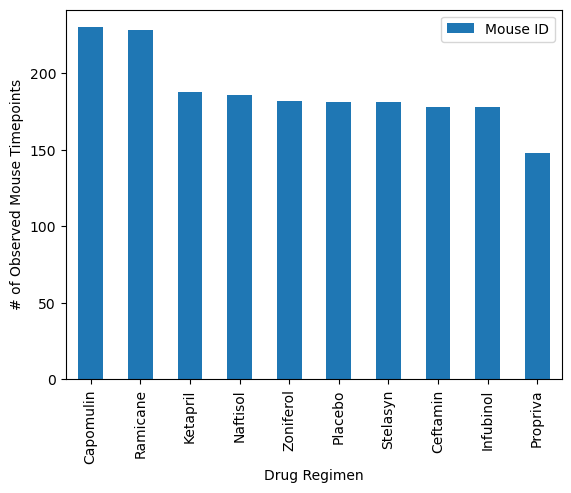

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot_df = cleaned_mouse_data[["Drug Regimen","Mouse ID"]]
grouped_bar_df = bar_plot_df.groupby(["Drug Regimen"]).count().sort_values("Mouse ID",ascending = False)
grouped_bar_df.plot(kind="bar",ylabel = "# of Observed Mouse Timepoints")
plt.show()

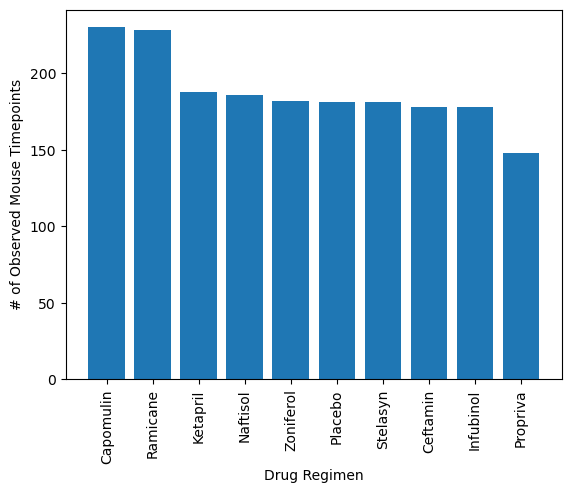

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pyplot

pyplot_data_df = cleaned_mouse_data[["Drug Regimen","Timepoint"]].sort_values("Drug Regimen")

x_axis = np.arange(len(summary_statistic_df.sort_values("Drug Regimen")))
y_axis = pyplot_data_df["Drug Regimen"].value_counts()

xticklabels = (y_axis.index)
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations,xticklabels,rotation = 90)



plt.bar(x_axis,y_axis,align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()


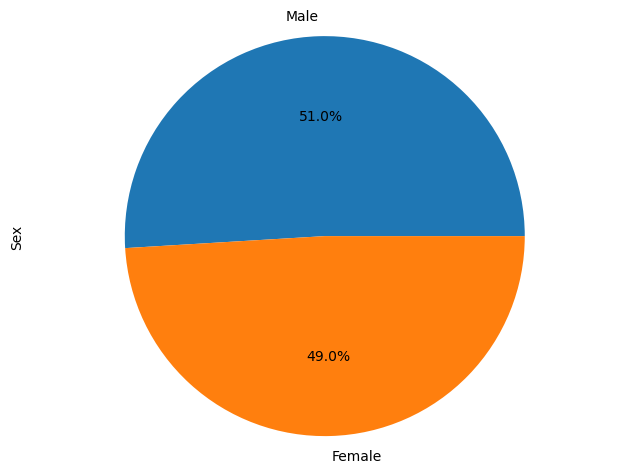

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pandas_pie_data = cleaned_mouse_data[["Mouse ID","Sex"]]
gender_df = pandas_pie_data.groupby("Sex").count().sort_values("Mouse ID",ascending=False)
gender_data = gender_data = gender_df["Mouse ID"]


gender_data.plot(kind="pie",ylabel ="Sex",autopct="%1.1f%%")
plt.axis("equal")
plt.tight_layout()
plt.show()

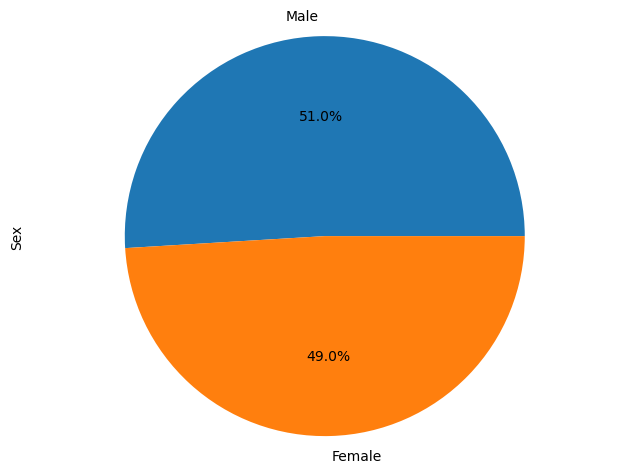

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot

pandas_pie_data = cleaned_mouse_data[["Mouse ID","Sex"]]
gender_df = pandas_pie_data.groupby("Sex").count().sort_values("Mouse ID",ascending=False)
gender_data = gender_df["Mouse ID"]
gender_labels = "Male","Female"

plt.pie(gender_data,labels = gender_labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [14]:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
#Merge this grouped DataFrame with the original cleaned DataFrame.

greatest_timepoint = cleaned_mouse_data.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)

merged_tumor_df = pd.merge(greatest_timepoint,cleaned_mouse_data, on = ["Mouse ID","Timepoint"])
merged_tumor_df.reset_index()
merged_tumor_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.

drug_regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
cap_tumor_volume = []
ram_tumor_volume = []
inf_tumor_volume = []
cef_tumor_volume = []


#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
#Append the resulting final tumor volumes for each drug to the empty list.

for x in range(len(merged_tumor_df)-1):
    if merged_tumor_df.loc[x,"Drug Regimen"] == "Capomulin":
        cap_tumor_volume.append(merged_tumor_df.loc[x,"Tumor Volume (mm3)"])
    elif merged_tumor_df.loc[x,"Drug Regimen"] == "Ramicane":
        ram_tumor_volume.append(merged_tumor_df.loc[x,"Tumor Volume (mm3)"])
    elif merged_tumor_df.loc[x,"Drug Regimen"] == "Infubinol":
        inf_tumor_volume.append(merged_tumor_df.loc[x,"Tumor Volume (mm3)"])
    elif merged_tumor_df.loc[x,"Drug Regimen"] == "Ceftamin":
        cef_tumor_volume.append(merged_tumor_df.loc[x,"Tumor Volume (mm3)"])
        
total_tumor_volume = [cap_tumor_volume,ram_tumor_volume,inf_tumor_volume,cef_tumor_volume]
        
#Determine outliers by using the upper and lower bounds, and then print the results.
for x in range(len(total_tumor_volume)):
    quartiles = pd.Series(total_tumor_volume[x]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {drug_regimen[x]} is:")
    print(f"{iqr}")
    for y in range(len(total_tumor_volume[x])):
        if (total_tumor_volume[x][y] > upper_bound) or (total_tumor_volume[x][y] < lower_bound):
            outliers=total_tumor_volume[x][y]
            print(f"Potential outliers for {drug_regimen[x]} are:")
            print(f"{outliers}")
        


The interquartile range for Capomulin is:
7.781863460000004
The interquartile range for Ramicane is:
9.098536719999998
The interquartile range for Infubinol is:
11.477135160000003
Potential outliers for Infubinol are:
36.3213458
The interquartile range for Ceftamin is:
15.577752179999997


C:\Users\arvos\AppData\Local\Temp\ipykernel_7908\1344963513.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_regimen)


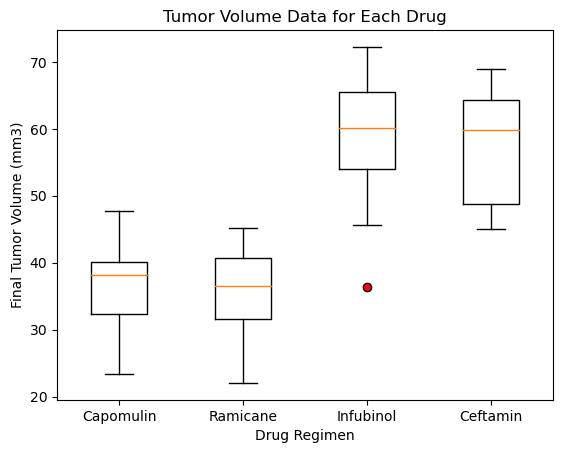

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.a
fig1,ax1 = plt.subplots()
ax1.set_xticklabels(drug_regimen)
ax1.set_title("Tumor Volume Data for Each Drug")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(total_tumor_volume,flierprops = dict(marker = "o", markerfacecolor = "red"))
plt.show()

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Lets first find mice that were treated with capomulin

capomulin_mouse_data = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"]=="Capomulin"]




In [18]:
#Looking at our filtered dataframe, we can pick a random mouse that was treated with Capomulin
#Filter the df again to show only the chosen mouse data and sort it in regards to timepoint

single_mouse_data = capomulin_mouse_data.loc[capomulin_mouse_data["Mouse ID"]=="s710"]
single_mouse_data.sort_values("Timepoint")


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
232,s710,0,45.000000,0,Capomulin,Female,1,23
300,s710,5,43.180977,0,Capomulin,Female,1,23
534,s710,10,43.688026,0,Capomulin,Female,1,23
874,s710,15,41.845235,0,Capomulin,Female,1,23
1105,s710,20,42.629963,1,Capomulin,Female,1,23
1129,s710,25,43.060409,1,Capomulin,Female,1,23
1448,s710,30,43.571703,1,Capomulin,Female,1,23
1607,s710,35,44.160519,1,Capomulin,Female,1,23
1666,s710,40,40.171920,1,Capomulin,Female,1,23
1854,s710,45,40.728578,1,Capomulin,Female,1,23


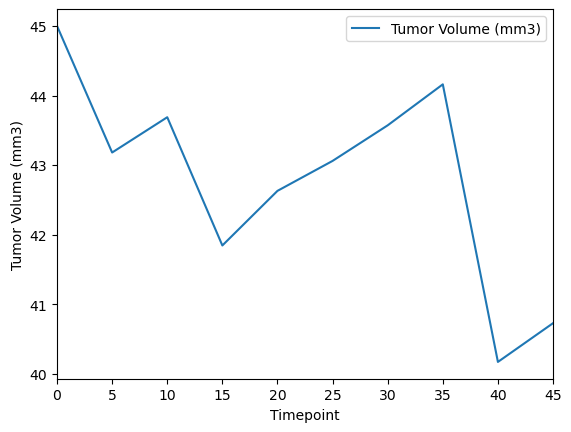

In [19]:
#Once we set the timepoint column to our index, we can plot this mouse data
single_mouse_data = single_mouse_data.set_index("Timepoint")
single_mouse_data.plot.line(y=["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.show()


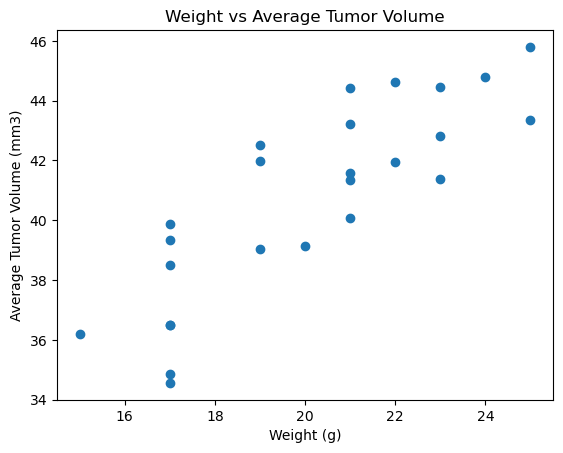

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_tumor_df = capomulin_mouse_data.groupby("Mouse ID")

cap_avg_tumor_volume = cap_tumor_df["Tumor Volume (mm3)"].mean()
cap_mouse_weight = cap_tumor_df["Weight (g)"].unique()
plt.scatter(cap_mouse_weight,cap_avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume")
plt.show()


(The correlation between mouse weight and the average tumor volume is [0.84116671]


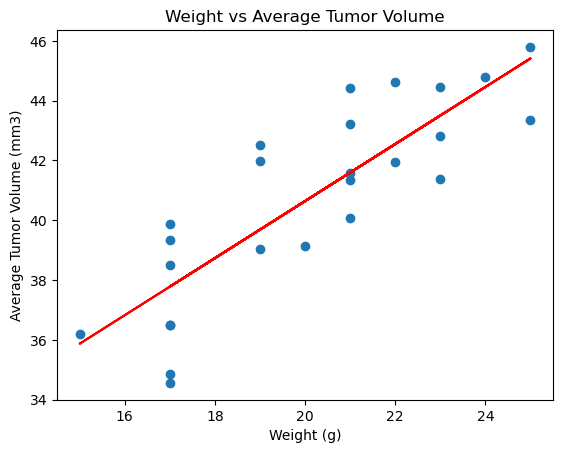

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



correlation = st.pearsonr(cap_mouse_weight,cap_avg_tumor_volume)
print(f"(The correlation between mouse weight and the average tumor volume is {correlation[0]}")

(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(cap_mouse_weight.astype(float),cap_avg_tumor_volume.astype(float))
regress_values = cap_mouse_weight*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cap_mouse_weight,regress_values,"r-")
plt.scatter(cap_mouse_weight,cap_avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume")
plt.show()
